# Introduction

*Comments in code are meant to be concise.  But in data science we may want to share details of the work, and perhaps provide some discussion of the choices made. So, this notebook is intended to be the explanatory companion to my Attrition_EDA.py file.  My personal workflow is to create .py files rather than notebooks. However, for this project I also wanted to include discussion beyond what is appropriate for code comments - hence this notebook.*


Start by importing the usual packages, setting warning levels and paths, and initializing any variables you need.  In my case, I also set the display option to show all the columns in the dataframe.  Typically, it is easier to let Python supress display of the middle columns, but for this explanation I wanted to include them.

Note: the warnign supression is to keep from being annoyed by a FutureWarning.  See https://github.com/numpy/numpy/issues/11411 and https://stackoverflow.com/questions/53334421/futurewarning-with-distplot-in-seaborn for details on it.


In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import gc

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)  # supressed to get around https://github.com/numpy/numpy/issues/11411

datapath = '~/gitRepo/Predicting_Employee_Attrition/data/'
outpath = '~/gitRepo/Predicting_Employee_Attrition/output/'

rnd_st = np.random.RandomState(31)

pd.set_option('display.max_columns', 50)  # set so it will show all columns for the first look at the data


I'm not a huge fan of the default Seaborn palette, although I do like Seaborn as my main graphing package, so I set my default palette to be one I prefer.


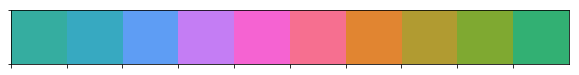

In [24]:
# set a pretty default palette
sns.palplot(sns.husl_palette(10, h=.5))
col_list_palette = sns.husl_palette(10, h=.5)
sns.set_palette(col_list_palette)


Read the data from a CSV file, and get an overview of the data by looking at the shape, the first 5 rows, the list of the data types you have, as well as a statistical summary of the columns.


In [25]:
train = pd.read_csv(datapath+'WA_Fn-UseC_-HR-Employee-Attrition.csv', delimiter=',', encoding='utf-8')

# look at general aspects of the data
print(train.shape,'\n')
#print(train.head(5),'\n')

train

(1470, 35) 



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [26]:
print(train.dtypes, '\n')
print(train.describe(),'\n')

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   


One of the key things to determine for any dataset is the number of incomplete rows.  Or, put another way, how many missing values are you dealing with in the data?  If there are missing values in a column, the *describe* command above would show that as a "count" value less then the total number of rows.  However, that is not the easiest way to see the columns which have missing data.  

The *info()* command will tell you how many non-null values you have for each column along with the data type, which can be useful in selecting a strategy for imputing data. 

Or, you can do a more explicit check, looking for *isna()* and *innull()* since you may wish to handle those separately, depending on how the data were devleoped.  

Here's how those options look:


In [27]:
print(train.info(), '\n','\n')

# explicitly check for missing values
print(train.isnull().values.any(), '\n','\n')
print(train.isna().sum(), '\n')

pd.set_option('display.max_columns', 10)  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         


You can see that the number of non-null values per column equals the number of rows (as shown by the call to *shape* above. The results of querying for any null values is "false" and the check for isna shows all 0 values.  So, great news, we have shown 3 different ways that this is an unusually polite dataset without any missing data.

You may have noticed in the look at the first 5 rows, that there are some columns which don't seem all that useful.  All employees are over 18, the EmployeeCount is always 1, and the StandardHours are 80 for everyone.  Since these columns will not have any predictive power, let's just get drop them and get them out of the way.

EmployeeNumber is a candidate for dropping, but I am keeping it for the moment.  It may turn out ot be collinear with YearsAtCompany or other features.  This will be checked, and it can be dropped later if needed.  In the meantime, it serves as a unique identified should we need one.

In [28]:
# drop columns which are not useful
# everyone is over 18, works 80 hours and EmployeeCount is always 1
train = train.drop( columns = ['Over18', 'EmployeeCount', 'StandardHours'], axis = 1)
train.shape

(1470, 32)


We've determined that there are not missing values to contend with, and know the size of the data (1470, 32).  From the *dtypes* command we know that the data are made of a mix of integer and object data types, so we know there are non-numeric columns to be handled somehow.  Let's move on and see how the data look graphically.  One classic approach to data visualization is to do a pairs-plot.  However, given the number of columns in this dataset, and the fact many columns are discrete numerics, pairplot was not particulalry useful, and it is slow.  So, I've comment it out.  Uncomment at your own risk.

I wanted to start by looking at the distribution of the categorical values.


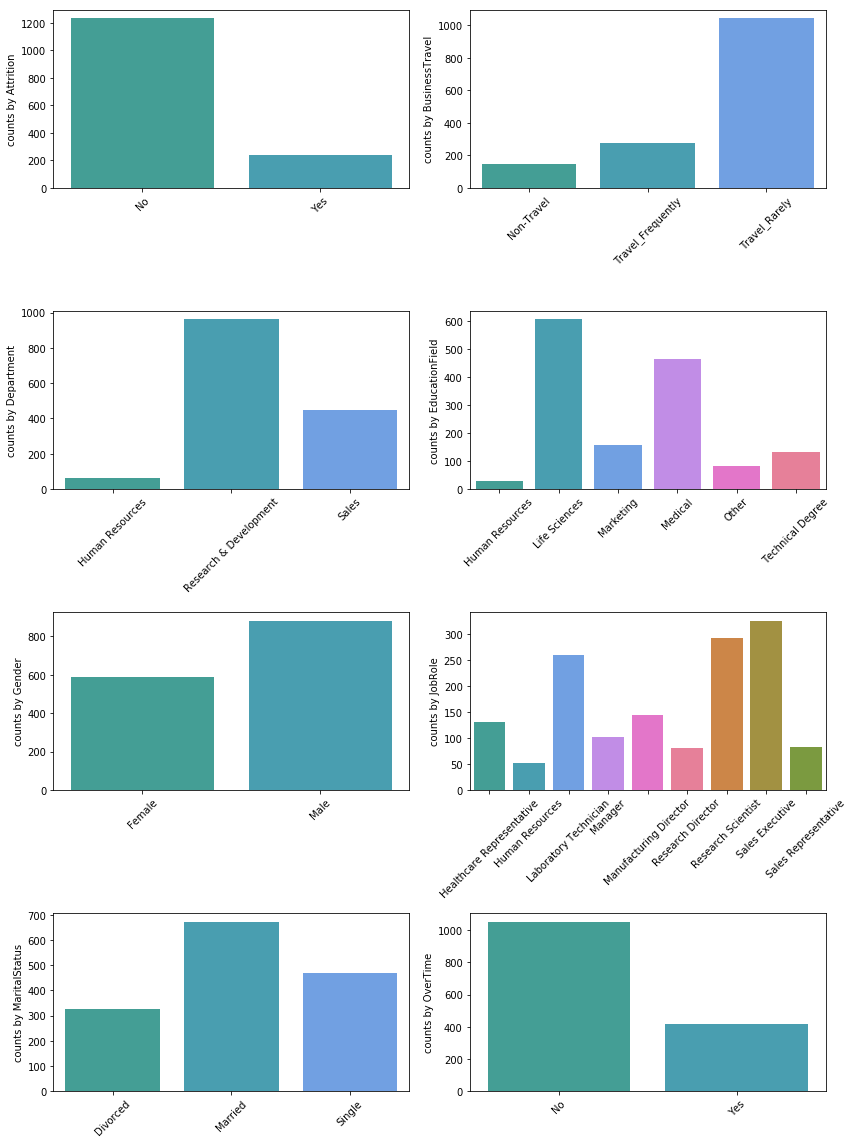

In [29]:
# not wildy useful given the number of features
#sns.pairplot(train)

# let's look at some of the distributions of the data
# start by looking at the catagorical data
plot_number = 1
df_objects = train.select_dtypes([object])
plt.figure(figsize=(12, 16), facecolor='white')
for c in df_objects.columns:
    col_counts = train[c].value_counts()
    col_counts.sort_index(inplace=True)
    ax = plt.subplot(4, 2, plot_number)
    sns.barplot(x = col_counts.index, y = col_counts)
    str_title = "counts by " + str(c)
    plt.ylabel(str_title)
    plt.xticks(rotation=45)
    plot_number = plot_number+1
plt.tight_layout()
plt.show()

In [30]:
print (train.Attrition.value_counts())
print('Attrition rate = ', 100 *(train.Attrition.value_counts()['Yes']/train.Attrition.value_counts()['No']))


No     1233
Yes     237
Name: Attrition, dtype: int64
Attrition rate =  19.22141119221411



So, the number of people who have left is roughly 19% of the population.  This classic Bernoulli distribution highlights an imbalance to be aware of.

Department and JobRole have a wide span, it may be desireable to do some specailly handling of those features when we begin modeling.  

Gender is not a perfect 50-50 split, but no too imbalanced either.

Works Overtime looks like it might be a 2/3 - 1/3 split, so let's check:

In [31]:
print('Overtime rate = ', 100 *(train.OverTime.value_counts()['Yes']/train.OverTime.value_counts()['No']))

Overtime rate =  39.46869070208729


OK, Overtime is roughly a 2/5 - 3/5 split, so we'll not worry about it at this time.  Let's also take a look at Travel.

In [32]:
print('Travels Often = ', 100 *(train.BusinessTravel.value_counts()['Travel_Frequently']/train.EmployeeNumber.count()))

Travels Often =  18.843537414965986



So, just as with Attrition, BusinessTravel ma need special handling when we go to build models.



Moving on, let's cycle thru the numeric data and see what views are interesting or worth noting.


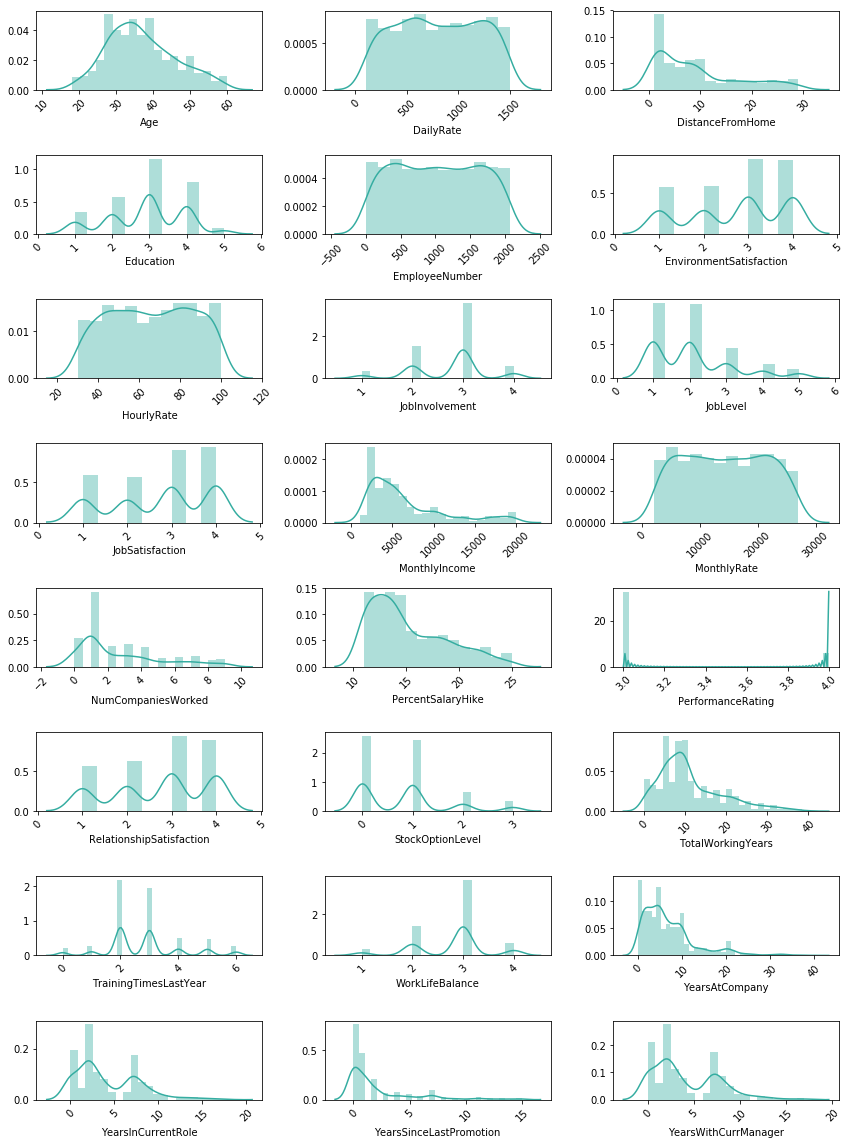

In [33]:
# now the numeric data    
plot_number = 1
plt.figure(figsize=(12, 16), facecolor='white')
df_ints = train.select_dtypes([int])
for c in df_ints.columns:
    ax = plt.subplot(8, 3, plot_number)
    sns.distplot(train[c])
    plt.xticks(rotation=45)
    plot_number = plot_number+1
plt.tight_layout()
plt.show()
    


The workforce Age runs from 18 to around 60 in a normal-ish distribution.  

DailyRate, HourlyRate and Monthly (which were *not* explained in the data source) are darn near uniform distributions. 

YearsInCurrentRole, YearsWithCurrManager and PerformanceRating show a sort of bimodal distribution, where as the other continuous variables like TotalWorkingYears,  MonthlyIncome, and DistanceFromHome are basically skewed normal distributions with long tails.

For discrete numeric values, this sort of distribution graph may not be the most useful view. ou can see how JobInvolvment and JobSatisfaction have wavy density plot lines.  Discrete variables ma be more interesting to view at the count for each discrete value.  So, let's pull out the continuous variables and re-graph the discrete values using he Seaborn *countplot* function.


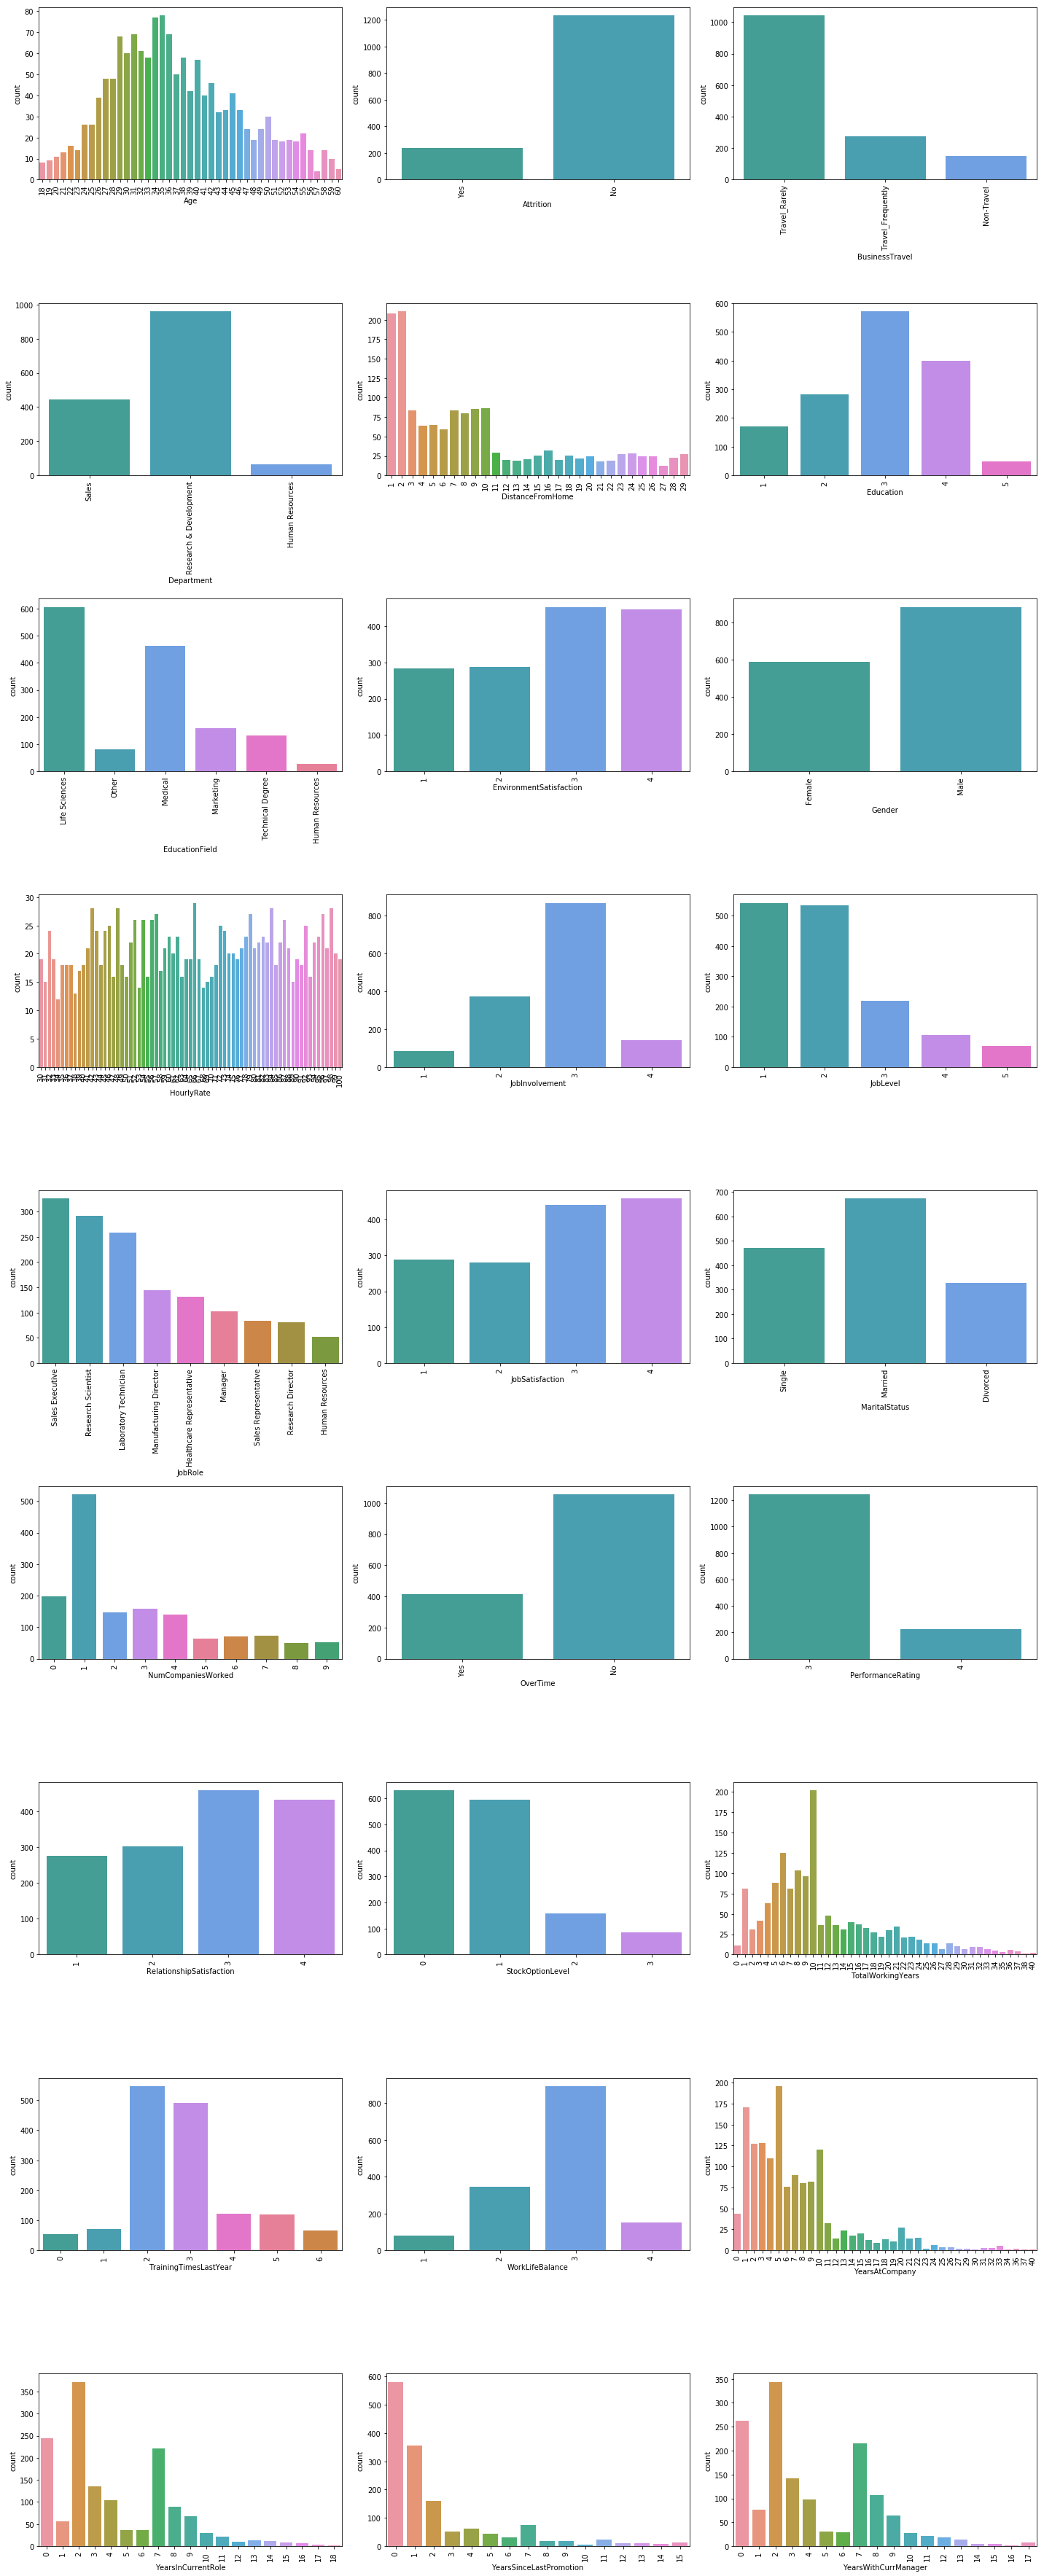

In [34]:
disc_list = ['Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'NumCompaniesWorked', 'OverTime','PerformanceRating', 
       'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears', 
       'TrainingTimesLastYear','WorkLifeBalance', 'YearsAtCompany', 
       'YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager']
    
plot_number = 1
plt.figure(figsize=(20, 60), facecolor='white')
for c in disc_list:
    ax = plt.subplot(11, 3, plot_number)
    sns.countplot(x=train[c], data=train)
    plt.xticks(rotation=90)
    plot_number = plot_number+1
plt.tight_layout()
plt.show()


Looking at some of the other relationships in the data, starting with strip plots, showing attrition versus other factors:
    

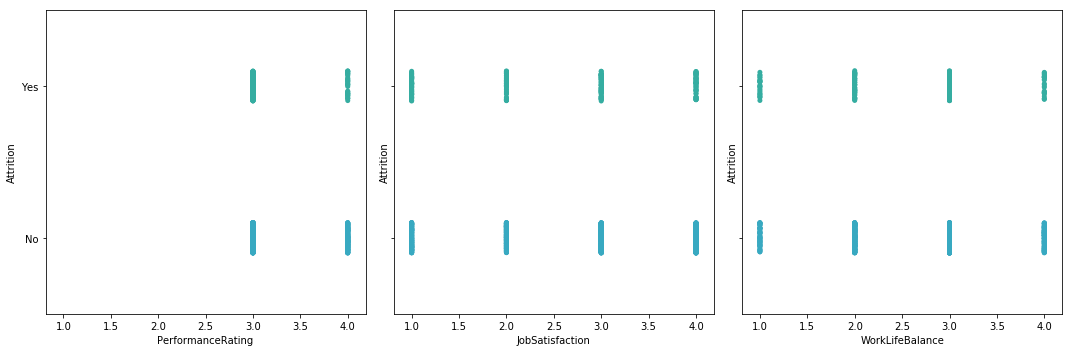

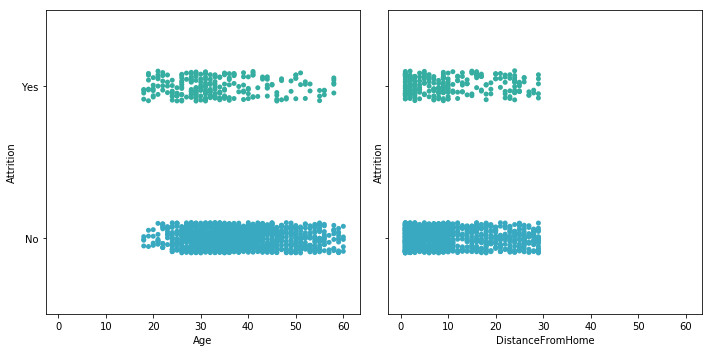

In [35]:
# let's look at some of the relationships in the data

# let's look at some of the relationships in the data
fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15,5))
#f, ax = plt.subplots(figsize=(6, 6))
ax1 = sns.stripplot(x="PerformanceRating", y="Attrition", data=train, jitter=True, ax = ax1)
#plt.show()
ax2 = sns.stripplot(x="JobSatisfaction", y="Attrition", data=train, jitter=True, ax = ax2)
#plt.show()
ax3 = sns.stripplot(x="WorkLifeBalance", y="Attrition", data=train, jitter=True, ax = ax3)
#plt.show()
plt.tight_layout()

fig, ((ax4, ax5)) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(10,5))
ax4 = sns.stripplot(x="Age", y="Attrition", data=train, jitter=True, ax = ax4)
#plt.show()
ax5 = sns.stripplot(x="DistanceFromHome", y="Attrition", data=train, jitter=True, ax = ax5)
#plt.show()
plt.tight_layout()


There are no obvious visual links between people who left and those who did not based on the features charted.  It is interesting to note that the JobSatisfaction numbers for those who did and did not quit look about the same.  This seems counter-intuitive, the same goes for WorkLifeBalance and Attrition.

There is an intuitive sense that certain aspects of a job may relate to job statisfaction.  For example, a long commute may lead to dissatifaction.  Or, if an employee hasn't had a promotion in a while, they may become discouraged and disatisfied.  So, let's look at the relation between a few factors and see what pops.


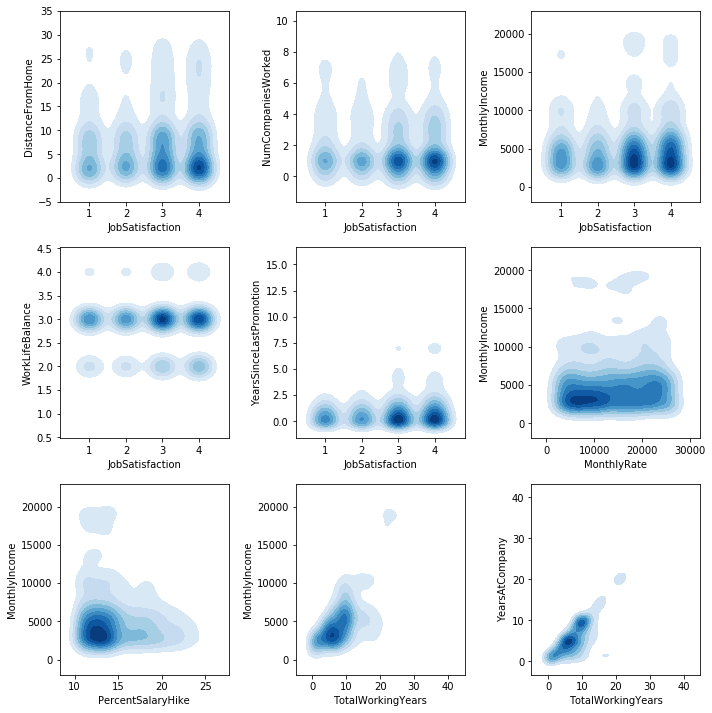

In [36]:
density_pairs = [['JobSatisfaction','DistanceFromHome'], ['JobSatisfaction','NumCompaniesWorked'],['JobSatisfaction','MonthlyIncome'],
                 ['JobSatisfaction','WorkLifeBalance'],['JobSatisfaction','YearsSinceLastPromotion'], ['MonthlyRate','MonthlyIncome'],
                 ['PercentSalaryHike', 'MonthlyIncome'], ['TotalWorkingYears', 'MonthlyIncome'], ['TotalWorkingYears', 'YearsAtCompany']]

plot_number = 1
plt.figure(figsize=(10, 10), facecolor='white')
for p in density_pairs:
    x = p[0]
    y = p[1]
    ax = plt.subplot(3, 3, plot_number)
    sns.kdeplot(train[x], train[y], cmap="Blues", shade=True, shade_lowest=False)
    plot_number = plot_number+1
plt.tight_layout()


No obvious relationship jumping out indicating a single pain-point that is the cause of employee attrition.  This isn't too surprising, since the reasons people leave a company are varied and complex.

Let's get an idea of the quartiles and outliers for some of the continuous features. 

The boxplots are shown as one grouped plot by features with similar scales.  Showing them in a grid made some too small to read.


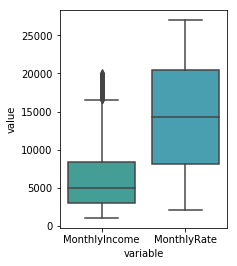

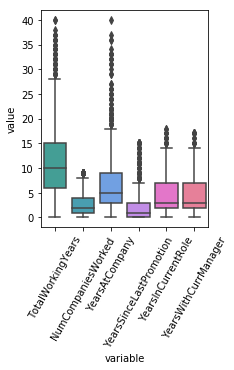

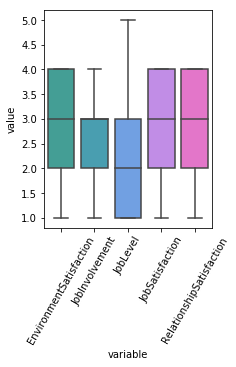

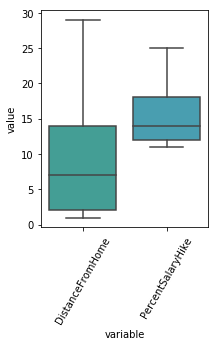

In [37]:
df_money = train[['MonthlyIncome', 'MonthlyRate']].copy()
f, ax = plt.subplots(figsize=(3,4))
sns.boxplot(x="variable", y="value", data=pd.melt(df_money))
plt.show()

df_service = train[['TotalWorkingYears', 'NumCompaniesWorked', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsInCurrentRole', 'YearsWithCurrManager' ]].copy()
f, ax = plt.subplots(figsize=(3,4))
sns.boxplot(x="variable", y="value", data=pd.melt(df_service))
plt.xticks(rotation=60)
plt.show()

df_sat = train[['EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'RelationshipSatisfaction']].copy()
f, ax = plt.subplots(figsize=(3,4))
sns.boxplot(x="variable", y="value", data=pd.melt(df_sat))
plt.xticks(rotation=60)
plt.show()

df_other = train[['DistanceFromHome', 'PercentSalaryHike']].copy()
f, ax = plt.subplots(figsize=(3,4))
sns.boxplot(x="variable", y="value", data=pd.melt(df_other))
plt.xticks(rotation=60)
plt.show()




While several features have outliers, I am choosing to leave them in as meaningful "signal" at this point.

Next, check correlations to see if there are hints at multi-collinearity to we need worry about.


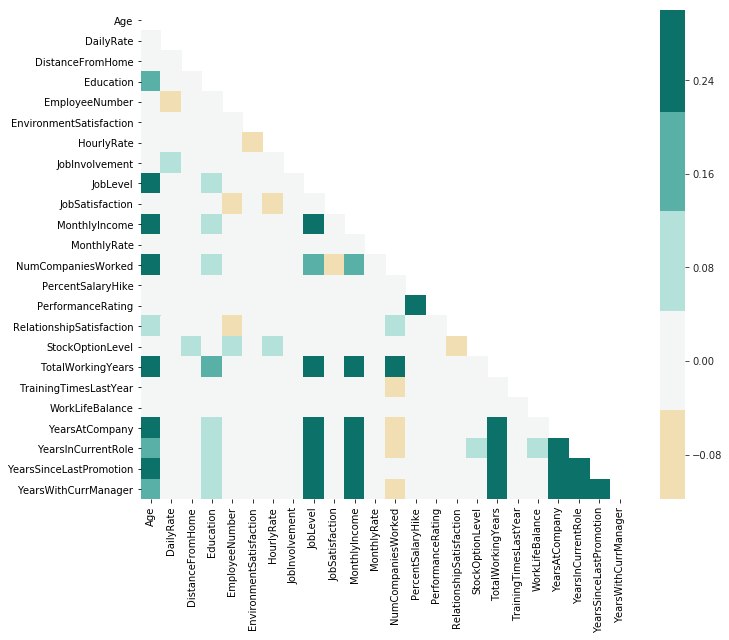

120538

In [38]:
# looking at a correlation matrix
t_corr = train.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))
mask = np.zeros_like(t_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(t_corr, mask=mask, vmax=.3, square=True, center = 0, cmap=sns.color_palette("BrBG", 7))
plt.show()

#print(t_corr)


#del df_money
#del df_service
#del df_sat
#del df_service
gc.collect()

There are correlations between expected features, like JobLevel and Monthly income.  To see how big an issue these might be. I want to look at the VIF (Variance Inflation Factor).  A VIF > 5 is often considered problematic and one should consider dropping the high VIF column when building OLS models. 


We need to deal with the categorical variables before trying to look at the VIF, so for the moment, I am making a copy of the dataframe and dropping the categorical columns.


In [39]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

tmp = train.copy(deep = True)
tmp = tmp.drop(['Attrition', 'BusinessTravel', 'Department',
       'EducationField', 'Gender', 'JobRole', 'MaritalStatus',
       'OverTime'], axis = 1)
X = add_constant(tmp)
VIF = pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)
print(VIF)


const                       205.886007
Age                           2.044997
DailyRate                     1.020863
DistanceFromHome              1.016514
Education                     1.061247
EmployeeNumber                1.019558
EnvironmentSatisfaction       1.010565
HourlyRate                    1.019212
JobInvolvement                1.016367
JobLevel                     11.208731
JobSatisfaction               1.016416
MonthlyIncome                10.802169
MonthlyRate                   1.012457
NumCompaniesWorked            1.257738
PercentSalaryHike             2.516413
PerformanceRating             2.514405
RelationshipSatisfaction      1.020376
StockOptionLevel              1.021305
TotalWorkingYears             4.767805
TrainingTimesLastYear         1.010545
WorkLifeBalance               1.014959
YearsAtCompany                4.587405
YearsInCurrentRole            2.718616
YearsSinceLastPromotion       1.674285
YearsWithCurrManager          2.774625
dtype: float64


Not too surprisingly, the VIF for JobLevel and MonthlyIncome show high VIF.  Both are most likely determined by combinations of other features like Department, TotalYearsWorking etc. 

JobLevel and MonthlyIncome have a high degree of multicollinearity, and we may want to take one out when building models, particularly if building any OLS models.

Finally, I want to create a fully numeric dataset. To do this, I converted categorical variables to named binary or one-hot encoded values depending on what the feature is.  

For example, the Gender column with values of 'M' and 'F' can be mapped from 'M' and 'F' to a new column called "is_male"  with 1/0 values for yes/no.  So, rather than one-hot encode it, and wind up with 2 columns, we can preserve the data, make it meaningful, and still have it encoded as a binary. This works for any category with 2 values, yes/no, on/off, and so on.

I could have used *get_dummies* for Marital Status, but opted to do it by hand as an example.  Also, I encoded *BussinessTravel* using integer values, rather than flags as I did with MaritalStatus.  I felt this was an OK thing to do, since I know that 'none', 'some', and 'often' can be ordered, so mapping to numeric values of 0,1,and 2 is not assigning numeric relativeism where none exists.  This may be revisted once I start building models.

Finally, I save the new dataset for use in the next step in this process: model building.

In [40]:
# let's create numeric representations of the yes/no binary columns
# use descriptive column names to show how the translation was done
train['has_quit'] = train['Attrition'].map({'Yes':1, 'No':0})
train['works_OT'] = train['OverTime'].map({'Yes':1, 'No':0})
train['is_male'] = train['Gender'].map({'Male':1, 'Female':0})
train['is_divorced'] = train['MaritalStatus'].map({'Divorced':1, 'Married':0, 'Single':0})
train['is_married'] = train['MaritalStatus'].map({'Divorced':0, 'Married':1, 'Single':0})
train['is_single'] = train['MaritalStatus'].map({'Divorced':0, 'Married':0, 'Single':1})
train['travels'] = train['BusinessTravel'].map({'Non-Travel':0, 'Travel_Rarely':1, 'Travel_Frequently':2})

# now for the catagories where one-hot encoding is needed
tmp = pd.get_dummies(train['JobRole'])
tmp.columns = ['is_healthcare_rep', 'is_HR', 'is_lab_tech', 'is_mgr', 'is_mfg_dir', 'is_res_dir', 'is_res_sci', 'is_sales_exc', 'is_sales_rep'] 
train = train.join(tmp)

tmp = pd.get_dummies(train['Department'])
tmp.columns = ['in_HR', 'in_R&D', 'in_sales'] 
train = train.join(tmp)

tmp = pd.get_dummies(train['EducationField'])
tmp.columns = ['edu_HR', 'edu_life_sci', 'edu_marketing', 'edu_med', 'edu_other', 'edu_tech'] 
train = train.join(tmp)

coded_train = train.copy(deep=True)

#del train
gc.collect()

coded_train = coded_train.drop(['Attrition', 'BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime'], axis = 1)

# save for later use
coded_train.to_csv(datapath+'processed_train.csv', sep=',', date_format = 'string', index = False, encoding = 'utf-8')
